In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('Data/Train_Test/X_train.csv').to_numpy()
y_train = pd.read_csv('Data/Train_Test/y_train.csv').to_numpy()
X_test = pd.read_csv('Data/Train_Test/X_test.csv').to_numpy()
y_test = pd.read_csv('Data/Train_Test/y_test.csv').to_numpy()

In [3]:
lr = LinearRegression()
mse = cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse = mse.mean()
print(mean_mse)

-4458.574643371887


In [4]:
ridge = Ridge()
params = {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,2,5,8,10,15,16,20,25,30,35,40,45,50,60,80,100,120,140,200]}
grid_ridge = GridSearchCV(ridge,param_grid=params,scoring = 'neg_mean_squared_error',cv = 5)
grid_ridge.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   2, 5, 8, 10, 15, 16, 20, 25, 30, 35, 40, 45,
                                   50, 60, 80, 100, 120, 140, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [5]:
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)

{'alpha': 80}
-4456.11880784132


In [8]:
lasso = Lasso()
params = {'alpha':[1e-100,1e-50,1e-25,1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,2,5,8,10,15,16,20,25,30,35,40,45,50,60,80,100,120,140,200]}
grid_lasso = GridSearchCV(lasso,param_grid=params,scoring = 'neg_mean_squared_error',cv = 5)
grid_lasso.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-100, 1e-50, 1e-25, 1e-15, 1e-10, 1e-08,
                                   1e-05, 0.001, 0.01, 1, 2, 5, 8, 10, 15, 16,
                                   20, 25, 30, 35, 40, 45, 50, 60, 80, 100, 120,
                                   140, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [9]:
print(grid_lasso.best_params_)
print(grid_lasso.best_score_)

{'alpha': 1e-100}
-4458.574643371885


### so ridge regression is the best fit among lassso reg and linear reg model

In [10]:
pred = grid_ridge.predict(X_test)

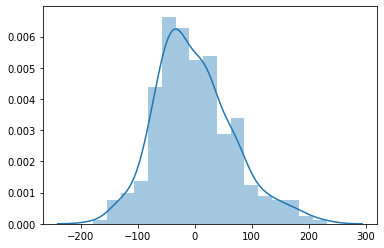

In [13]:
sns.distplot(y_test-pred)

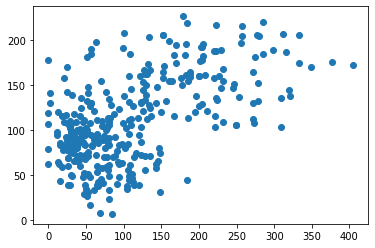

In [15]:
plt.scatter(y_test,pred)

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 53.7126311366017
MSE: 4626.1108774134955
RMSE: 68.01551938648632


In [21]:
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(grid_ridge, file)